[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/6.4%20%EC%B6%94%EC%84%B8%20%EC%A7%80%ED%91%9C%20MACD-output.ipynb)


# MACD(Moving Average Convergence and Divergence)

MACD는 이동평균 수렴확산 지수(移動平均 收斂擴散 指數, 영어: moving average convergence divergence)의 약자로 1970년대 후반에 제럴드 아펠(Gerald Appel)이 만든 주가의 기술적 분석에 사용되는 지표이다. MACD는 주가 추세의 강도, 방향, 모멘텀 및 지속 시간의 변화를 나타내도록 설계되었다.

MACD는 과거의 가격 데이터(대부분 증가)로부터 계산된 세 가지 시계열의 모음이다. 이러한 세 가지 시계열은 MACD 고유의 "신호", "평균", "확산"이다. MACD는 장기 지수이동평균과 단기 지수이동평균 간의 차이이다. 평균은 MACD 자체의 지수이동평균이다.

* 출처 : [MACD - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/MACD)

주가의 단기 이동평균선과 장기 이동평균선의 수렴과 확산을 나타내는 지표이다. 단기 이동평균선과 장기 이동평균선이 주가의 변동으로 인해 수렴과 확산을 반복한다는 원리에 기반을 두고 두 이동평균선의 차이가 가장 큰 시점을 찾아내 추세 변화의 신호로 삼는 지표이다. MACD는 크게 MACD 선과 시그널선(signal line)으로 구성된다. **MACD 선은 단기 지수이동평균과 장기 지수이동평균의 차이로 구해지며 일반적으로 단기 이동평균선의 경우 12일, 장기 이동평균선의 경우 26일이 이용된다.** <font color="red">단기 지수이동평균이 장기 지수이동평균보다 위쪽에 위치하면 MACD선은 양수가 되고 이것은 주가가 상승하는 신호로 여겨진다.</font>  반대로 <font color="blue">단기 지수이동평균이 장기 지수이동평균보다 아래쪽에 있으면 MACD 선은 음수가 되고 이것은 주가가 하락하는 신호로 여겨진다.</font> 

시그널선은 일정 기간 동안의 MACD지수 이동평균으로 정의되며 일반적으로 MACD의 9일 지수이동평균이 이용된다. 즉 12일 동안의 지수이동평균과 26일 동안의 지수이동평균을 구한 후 이들 간의 차이를 다시 9일 동안의 지수이동평균으로 산출하는 것이다. MACD선과 시그널선이 교차하는 시점이 바로 단기 이동평균과 장기 이동평균간의 차이가 가장 큰 것으로 간주된다. 그래서 MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호, 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호로 해석된다.

MACD는 추세 전환 시점을 예측하기보다 **추세의 방향과 주가의 움직임을 분석하는 데 유용한 지표**로 평가된다.

[네이버 지식백과] MACD [Moving Average Convergence and Divergence] (두산백과)

* 출처 : https://terms.naver.com/entry.nhn?docId=5868194&cid=40942&categoryId=31830

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f9/MACDpicwiki.gif">

이미지 출처 : [MACD - Wikipedia](https://en.wikipedia.org/wiki/MACD)

## MACD의 세가지 지표
1. MACD = 12일 이동평균선 - 26일 이동평균선
2. MACD Signal = MACD의 9일 이동평균선
3. 0선 = 지표값의 양/음을 나타내는 기준석(직선)


## MACD 값에 따른 의미와 매매지표
1. MACD > 0 : 주가 상승 추세 (12일선이 26일선 위에 위치)
2. MACD < 0 : 주가 하락 추세 (12일선이 26일선 아래에 위치)
3. MACD와 signal이 골든크로스 = OSC가 0 위로 돌파 : 단기적 주가 상승 국면
4. MACD와 signal이 데드크로스 = OSC가 0 아래로 돌파 : 단기적 주가 하락 국면

In [1]:
# 데이터 분석을 위해 pandas, numpy, 시각화를 위해 matplotlib 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 그래프 스타일 설정
plt.style.use("seaborn")

## 개별종목 일별시세 가져오기

##연결

In [3]:
! pip install PyMySQL

     |████████████████████████████████| 43 kB 1.0 MB/s 


In [4]:
import pymysql.cursors

In [5]:
# 데이터베이스 연결
connection = pymysql.connect(host='13.124.77.49', #EC2 아이피
                             user='USER_SQLSTK',  #데이터베이스 사용자
                             password='1qaz2wsx', #데이터베이스 암호
                             database='DB_SQLSTK', #데이터베이스 이름
                             charset='utf8',       # 언어 설정 
                             cursorclass=pymysql.cursors.DictCursor # 조회결과를 dictionary로 리턴
                             )

In [6]:
connection

In [7]:
cursor = connection.cursor()

In [8]:
cursor

##쿼리

In [71]:
#실행할 SQL
# 2019년 1월 1일 ~ 2020년 12월 31일 삼성전자의 종가,시가,고가,저가, 거래량조회
sql = """
      SELECT T1.STK_CD,T1.DT, T1.C_PRC, T1.O_PRC, T1.H_PRC, T1.L_PRC, T1.VOL
      FROM  HISTORY_DT T1
      WHERE T1.STK_CD = '004980'
      AND T1.DT >= '2019-01-01'
      AND T1.DT <= '2019-02-28'
"""  

###변환

In [72]:
# SQL 쿼리를 실행할 준비를 함
cursor.execute(sql)

39

In [73]:
# SQL 쿼리를 실행하고 결과를 result에 저장
result = cursor.fetchall()

In [74]:
# SQL 쿼리 실행 결과 출력
result

[{'C_PRC': Decimal('11200.000'),
  'DT': datetime.date(2019, 1, 2),
  'H_PRC': Decimal('12250.000'),
  'L_PRC': Decimal('11050.000'),
  'O_PRC': Decimal('12200.000'),
  'STK_CD': '004980',
  'VOL': Decimal('926302.000')},
 {'C_PRC': Decimal('11300.000'),
  'DT': datetime.date(2019, 1, 3),
  'H_PRC': Decimal('11850.000'),
  'L_PRC': Decimal('10950.000'),
  'O_PRC': Decimal('11300.000'),
  'STK_CD': '004980',
  'VOL': Decimal('782419.000')},
 {'C_PRC': Decimal('11150.000'),
  'DT': datetime.date(2019, 1, 4),
  'H_PRC': Decimal('11400.000'),
  'L_PRC': Decimal('10900.000'),
  'O_PRC': Decimal('11250.000'),
  'STK_CD': '004980',
  'VOL': Decimal('370392.000')},
 {'C_PRC': Decimal('11600.000'),
  'DT': datetime.date(2019, 1, 7),
  'H_PRC': Decimal('11800.000'),
  'L_PRC': Decimal('11300.000'),
  'O_PRC': Decimal('11550.000'),
  'STK_CD': '004980',
  'VOL': Decimal('419191.000')},
 {'C_PRC': Decimal('12250.000'),
  'DT': datetime.date(2019, 1, 8),
  'H_PRC': Decimal('12800.000'),
  'L_PRC': 

In [75]:
# result를 DataFrame으로 변환
df = pd.DataFrame(result)

In [76]:
df

,STK_CD,DT,C_PRC,O_PRC,H_PRC,L_PRC,VOL
0,004980,2019-01-02,11200.000,12200.000,12250.000,11050.000,926302.000
1,004980,2019-01-03,11300.000,11300.000,11850.000,10950.000,782419.000
2,004980,2019-01-04,11150.000,11250.000,11400.000,10900.000,370392.000
3,004980,2019-01-07,11600.000,11550.000,11800.000,11300.000,419191.000
4,004980,2019-01-08,12250.000,11750.000,12800.000,11600.000,1561456.000
5,004980,2019-01-09,12600.000,12450.000,12650.000,12200.000,667663.000
6,004980,2019-01-10,12300.000,12750.000,13100.000,12250.000,844668.000
7,004980,2019-01-11,12750.000,12300.000,12800.000,12250.000,738795.000
8,004980,2019-01-14,12900.000,12950.000,13050.000,12550.000,635831.000
9,004980,2019-01-15,13100.000,12800.000,13450.000,12600.000,1193456.000


In [77]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   STK_CD  39 non-null     object
 1   DT      39 non-null     object
 2   C_PRC   39 non-null     object
 3   O_PRC   39 non-null     object
 4   H_PRC   39 non-null     object
 5   L_PRC   39 non-null     object
 6   VOL     39 non-null     object
dtypes: object(7)
memory usage: 2.3+ KB


In [78]:
# DT 컬럼의 타입을 날짜와 시간으로 변환
df["DT"] = pd.to_datetime (df["DT"])

In [79]:
# C_PRC 컬럼부터 마지막 컬럼까지의 타입을 정수로 변환
df.loc[: , "C_PRC" : ] = df.loc[: , "C_PRC" : ].astype(int)

In [80]:
# df의 컬럼 타입 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   STK_CD  39 non-null     object        
 1   DT      39 non-null     datetime64[ns]
 2   C_PRC   39 non-null     int64         
 3   O_PRC   39 non-null     int64         
 4   H_PRC   39 non-null     int64         
 5   L_PRC   39 non-null     int64         
 6   VOL     39 non-null     int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.3+ KB


## 지수이동평균 구하기
* 단순이동평균선은 추세전환 신호가 늦게 나타난다는 단점이 있기 때문에 이를 해결하기 위해서 MACD에서는 지수이동평균을 사용합니다.
* 단순이동 평균과 지수 이동 평균 : https://www.cmegroup.com/ko/education/learn-about-trading/courses/technical-analysis/understanding-moving-averages.html#

In [81]:
# 12일 지수이동평균을 구합니다.
short = 12
df["ema_short"] = df["C_PRC"].ewm(short).mean()

In [82]:
# 26일 지수이동평균을 구합니다.
long = 26
df["ema_long"] = df["C_PRC"].ewm(long).mean()

In [83]:
# 거래일 DT를 인덱스로 설정 합니다
df = df.set_index("DT")

In [84]:
df

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,ema_short,ema_long
DT,,,,,,,,
2019-01-02,004980,11200,12200,12250,11050,926302,11200.000000,11200.000000
2019-01-03,004980,11300,11300,11850,10950,782419,11252.000000,11250.943396
2019-01-04,004980,11150,11250,11400,10900,370392,11215.245203,11216.018035
2019-01-07,004980,11600,11550,11800,11300,419191,11323.271565,11317.514268
2019-01-08,004980,12250,11750,12800,11600,1561456,11539.408056,11518.347064
2019-01-09,004980,12600,12450,12650,12200,667663,11753.328643,11716.049047
2019-01-10,004980,12300,12750,13100,12250,844668,11851.359878,11809.205545
2019-01-11,004980,12750,12300,12800,12250,738795,11997.538692,11942.910868
2019-01-14,004980,12900,12950,13050,12550,635831,12132.745929,12065.997705


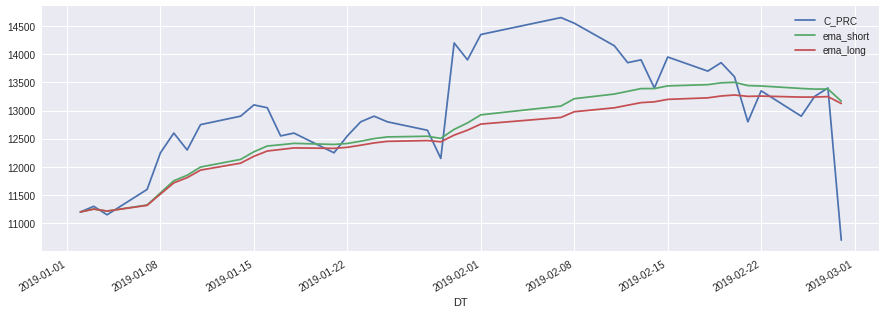

In [85]:
# "C_PRC", "ema_short" (12일 지수 이동평균), "ema_long"(26일 지수 이동 평균) 을 시각화 합니다.
df[["C_PRC", "ema_short", "ema_long"]].plot(figsize=(15, 5))

## MACD값 구하기

## MACD 값에 따른 의미와 매매지표
1. MACD > 0 : 주가 상승 추세 (12일선이 26일선 위에 위치)
2. MACD < 0 : 주가 하락 추세 (12일선이 26일선 아래에 위치)
3. MACD와 signal이 골든크로스 = OSC가 0 위로 돌파 : 단기적 주가 상승 국면
4. MACD와 signal이 데드크로스 = OSC가 0 아래로 돌파 : 단기적 주가 하락 국면

In [86]:
# MACD = 단기 지수이동평균(12일 지수 이동 평균) - 장기 지수이동평균 (26일 지수 이동 평균)
df["MACD"] = df["ema_short"] - df["ema_long"]

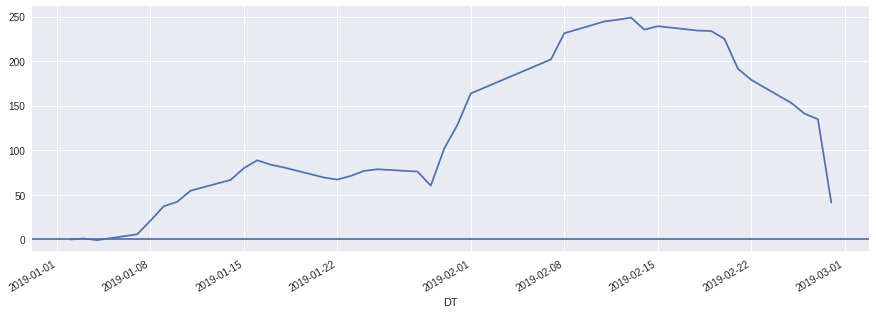

In [87]:
# MACD 값 시각화
df["MACD"].plot(figsize=(15, 5))
# 0 지점에 선을 그림
plt.axhline(0)

## MACD 시각화 

* MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호
* 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호
* (주의 : 매수 신호와 매도 신호는 지표에서 데이터를 보는 기준이기 때문에 실제 거래와는 맞지 않을 수 있습니다.)

In [88]:
# MACD의 9일 이동평균값을 구합니다.
df["signal"] = df["MACD"].ewm(9).mean()

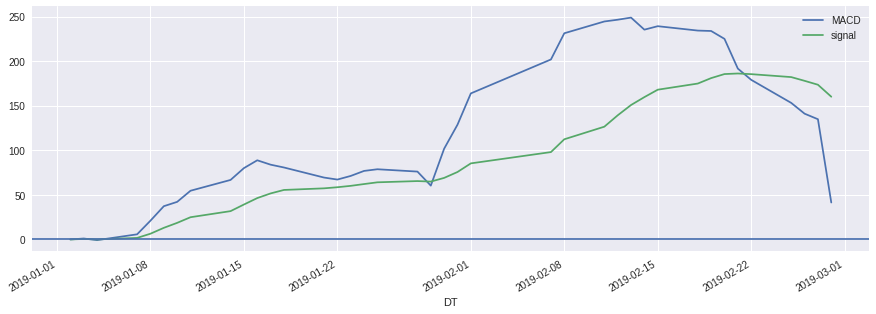

In [89]:
# MACD 와 9일 이동 평균 signal 시각화

# MACD선이 시그널선 위로 올라가게 되면 MACD가 9일 동안의 평균보다 높게 형성되었다는 의미이므로 매수 신호
# 반대로 MACD선이 시그널선 아래로 내려가게 되면 MACD가 9일 동안의 평균보다 낮게 형성되었다는 의미이므로 매도 신호
df[["MACD", "signal"]].plot(figsize=(15, 5))

# 0에 선을 그림
plt.axhline(0)

## MACD oscillator 값 구하기
* 볼린저 밴드의 %B 값
* RSI의 signal 값
* macdhist 값은 오실레이터(oscillator) 와 유사합니다.
* 기준선을 중심으로 아래위로 움직이는 성질을 갖는 지표를 오실레이터라 한다. 대개 추세 변화를 빨리 감지하려는 목적이며, 그래프의 기울기(변화량)를 측정하는 것과 비슷하다. 출처 : [스토캐스틱 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%8A%A4%ED%86%A0%EC%BA%90%EC%8A%A4%ED%8B%B1)

* https://www.nanumtrading.com/fx-%EB%B0%B0%EC%9A%B0%EA%B8%B0/%EC%B0%A8%ED%8A%B8-%EB%B3%B4%EC%A1%B0%EC%A7%80%ED%91%9C-%EC%9D%B4%ED%95%B4/04-%EC%8A%A4%ED%86%A0%EC%BA%90%EC%8A%A4%ED%8B%B1/

In [90]:
# MACD oscillator 계산
df["macdhist"] = df["MACD"] - df["signal"]

<BarContainer object of 39 artists>

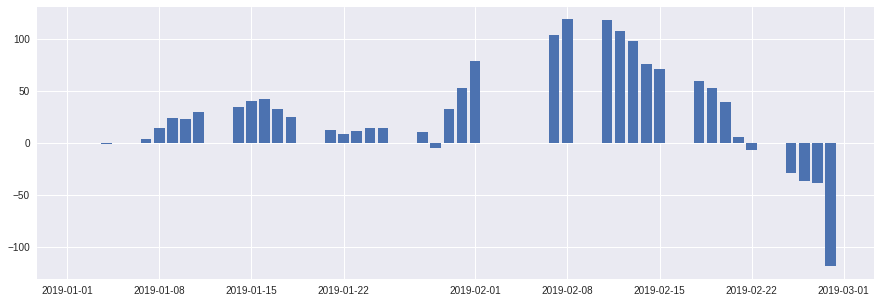

In [91]:
plt.figure(figsize=(15,5))
# MACD oscillator  시각화
plt.bar(df.index, df.macdhist)

In [92]:
df

,STK_CD,C_PRC,O_PRC,H_PRC,L_PRC,VOL,ema_short,ema_long,MACD,signal,macdhist
DT,,,,,,,,,,,
2019-01-02,004980,11200,12200,12250,11050,926302,11200.000000,11200.000000,0.000000,0.000000,0.000000
2019-01-03,004980,11300,11300,11850,10950,782419,11252.000000,11250.943396,1.056604,0.556107,0.500497
2019-01-04,004980,11150,11250,11400,10900,370392,11215.245203,11216.018035,-0.772833,0.065724,-0.838556
2019-01-07,004980,11600,11550,11800,11300,419191,11323.271565,11317.514268,5.757297,1.720732,4.036565
2019-01-08,004980,12250,11750,12800,11600,1561456,11539.408056,11518.347064,21.060992,6.443513,14.617479
2019-01-09,004980,12600,12450,12650,12200,667663,11753.328643,11716.049047,37.279597,13.024559,24.255038
2019-01-10,004980,12300,12750,13100,12250,844668,11851.359878,11809.205545,42.154334,18.608151,23.546182
2019-01-11,004980,12750,12300,12800,12250,738795,11997.538692,11942.910868,54.627824,24.932576,29.695248
2019-01-14,004980,12900,12950,13050,12550,635831,12132.745929,12065.997705,66.748224,31.758735,34.989490


## MACD 시각화 함수 만들기

## plotly를 통한 시각화

In [93]:
# plotly 최신버전을 사용해 주세요. 최신버전이 아닐 때 동작하지 않을 수 있습니다.
!pip install plotly --upgrade

### plotly.express 로 간단하게 시각화 하기

In [94]:
# plotly.express 로드하기
import plotly.express as px

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39 entries, 2019-01-02 to 2019-02-28
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STK_CD     39 non-null     object 
 1   C_PRC      39 non-null     int64  
 2   O_PRC      39 non-null     int64  
 3   H_PRC      39 non-null     int64  
 4   L_PRC      39 non-null     int64  
 5   VOL        39 non-null     int64  
 6   ema_short  39 non-null     float64
 7   ema_long   39 non-null     float64
 8   MACD       39 non-null     float64
 9   signal     39 non-null     float64
 10  macdhist   39 non-null     float64
dtypes: float64(5), int64(5), object(1)
memory usage: 3.7+ KB


In [96]:
# 주식의 시가, 고개, 저가, 종가 시각화
px.line(df[["O_PRC","H_PRC","L_PRC","C_PRC"]], title="OHLC")

In [97]:
# "MACD", "signal" 을 시각화 합니다.
px.line(df[["MACD", "signal"]], title="MACD", height=500)

In [98]:
# 막대그래프로 macdhist 를 시각화 합니다.
px.bar(df["macdhist"], height=300)

### graph_objects 와 subplots 을 사용한 시각화
* [Subplots | Python | Plotly](https://plotly.com/python/subplots/)

In [99]:
# plotly의 subplots, graph_objects 로드하기
import plotly.graph_objects as go
from plotly import subplots

In [100]:
# 시가 종가 저가 고가를 나타내는 봉차트
candlestick = go.Candlestick(x=df.index, 
                             open=df.O_PRC, 
                             high=df.H_PRC, 
                             low=df.L_PRC, 
                             close=df.C_PRC)

# MACD 선차트
macd = go.Scatter(x=df.index, y=df["MACD"], name="MACD")

# signal 선차트
signal = go.Scatter(x=df.index, y=df["signal"], name="signal")

# macdhist 막대 차트
oscillator = go.Bar(x=df.index, y=df["macdhist"], name="oscillator")

# 거래량 막대 차트
trade_volume = go.Bar(x=df.index, y=df["VOL"], name="거래량")


In [101]:
# make_subplots을 통해 4개의 행과 1개의 컬럼을 갖는 서브플롯을 생성합니다.
# append_trace 를 통해 fig 변수 안에 시각화 하고자 하는 그래프를 넣어줍니다.

# 4줄 1칸의 그래프 생성
fig = subplots.make_subplots(rows=4, cols=1)

#1번째줄 1번째 칸에 봉차트
fig.append_trace(candlestick, 1, 1)

# 3번째줄 1번째 칸에 macd 차트
fig.append_trace(macd, 3, 1)

# 3번째줄 1번째 칸에 signal 차트
fig.append_trace(signal, 3, 1)

# 3번째줄 1번째 칸에 oscillator 차트
fig.append_trace(oscillator, 3, 1)


# 4번째줄 1번째 칸에 거래량 차트
fig.append_trace(trade_volume, 4, 1)
fig.show()

## MACD 값에 따른 의미와 매매지표
1. MACD > 0 : 주가 상승 추세 (12일선이 26일선 위에 위치)
2. MACD < 0 : 주가 하락 추세 (12일선이 26일선 아래에 위치)
3. MACD와 signal이 골든크로스 = OSC가 0 위로 돌파 : 단기적 주가 상승 국면
4. MACD와 signal이 데드크로스 = OSC가 0 아래로 돌파 : 단기적 주가 하락 국면